# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

*Greyson Voigt*

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

# Problem 1

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

N = 20
N_trials = 2000

In [143]:
grid = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        grid[i][j] = 2*randint(0,1) - 1
print(grid)

[[ 1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.
  -1.  1.]
 [ 1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
   1. -1.]
 [ 1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.
   1.  1.]
 [-1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1.
   1. -1.]
 [-1.  1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.
  -1.  1.]
 [ 1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  -1.  1.]
 [-1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
  -1. -1.]
 [-1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.
   1.  1.]
 [ 1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1.
  -1.  1.]
 [ 1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1.
   1.  1.]
 [-1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.
  -1.  1.]
 [-1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.

In [155]:
def metroMC(start,B):
    for i in range(N**2):
        x = randint(0,1)
        y = randint(0,1)
        z = start[x,y]
        adj = start[(x+1)%N,y]+start[(x-1)%N,y]+start[x,(y+1)%N]+start[x,(y-1)%N]
        dE=.5*z*adj
        if dE < 0:
            z = -z
        else:
            if random() < np.exp(B*dE):
                z = -z
        start[x,y]=z
    return start

In [150]:
def Mag(start):
    spin = 0
    for i in range(N):
        for j in range(N):
            spin += start[i,j]
    return spin

In [146]:
def Energy(start):
    EnergySum = 0
    for x in range(N):
        for y in range(N):
            z = start[x,y]
            adj = start[(x+1)%N,y]+start[(x-1)%N,y]+start[x,(y+1)%N]+start[x,(y-1)%N]
            EnergySum += -z*adj
    return EnergySum

In [156]:
T = np.linspace(1,4,1000)
EnV = np.zeros(1000)
SpinV = np.zeros(1000)
for num in range(1000):
    En = 0
    M = 0
    for i in range(N_trials):
        metroMC(grid,1/T[num])
    for i in range(N_trials):
        metroMC(grid,1/T[num])
        newEn = Energy(grid)
        newMag = Mag(grid)
        En += newEn
        M += newMag
        EnV[num] = En/(N_trials*(N**2))
        SpinV[num] = M/(N_trials*(N**2))

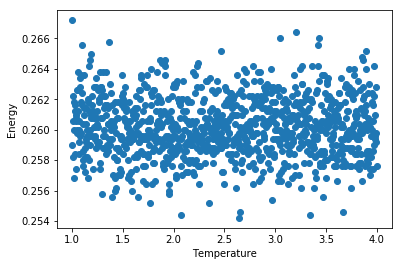

In [159]:
plt.plot(T, EnV,"o");
plt.xlabel("Temperature");
plt.ylabel("Energy");

plt.show()

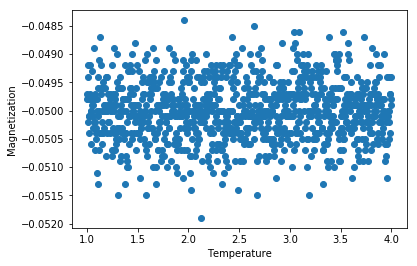

In [158]:
plt.plot(T,SpinV,"o");
plt.xlabel("Temperature");
plt.ylabel("Magnetization");
plt.show()

My plots look basically like random distributions. I'm not sure where I went wrong, though the graphs do seem to at least float around .26 and -.05 respectively. There definitely doesn't seem to be anything special about T = 2.27